# Comparative Analysis of Classical Machine Learning Algorithms and Artificial Neural Networks for Binary Intrusion Detection Using the NSL-KDD Dataset 

This project implements a Network Intrusion Detection System (NIDS) using the NSL-KDD dataset, which is well known in the cybersecurity domain for benchmarking. My primary goal is to perform binary classification, distinguishing between normal and attack in network traffic. I will explore and compare the effectiveness of different Machine Learning algorithms and an Artificial Neural Network (ANN) for this purpose. This notebook provides a hands-on guide covering essential steps from data preprocessing to model evaluation for AI/ML beginners.

1. Import Libraries
   - pip install numpy
   - pip install pandas
   - pip install matplotlib
   - pip install seaborn
   - pip install scikit-learn
   - pip install tensorflow

2. Basic Import Tests

In [720]:
try:
    import numpy as np
    print("NumPy imported: Success")
except ModuleNotFoundError:
    print("NumPy could not be imported. Please install with: pip install numpy")

try:
    import pandas as pd
    print("Pandas imported: Success")
except ModuleNotFoundError:
    print("Pandas could not be imported. Please install with: pip install pandas")

try:
    import matplotlib.pyplot as plt
    print("Matplotlib imported: Success")
except ModuleNotFoundError:
    print("Matplotlib could not be imported. Please install with: pip install matplotlib")

try:
    import seaborn as sns
    print("Seaborn imported: Success")
except ModuleNotFoundError:
    print("Seaborn could not be imported. Please install with: pip install seaborn")

try:
    import sklearn
    print("Scikit-learn (sklearn) imported: Success")
except ModuleNotFoundError:
    print("Scikit-learn could not be imported. Please install with: pip install scikit-learn")

try:
    import tensorflow as tf
    print("TensorFlow imported: Success")
except ModuleNotFoundError:
    print("TensorFlow could not be imported. Please install with: pip install tensorflow")

print("\nAll basic import tests completed.")

NumPy imported: Success
Pandas imported: Success
Matplotlib imported: Success
Seaborn imported: Success
Scikit-learn (sklearn) imported: Success
TensorFlow imported: Success

All basic import tests completed.


3. Data Acquisition & Loading 

In [721]:
# train dataset
df_train_0 = pd.read_csv('datasets/KDDTrain+.txt')
df_train = df_train_0.copy()
df_train.head()




,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [722]:
print(df_train.columns)

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')


3.1. Adjust Header
 - As you can see the data has no features names. Therefore i adjust the columns based from the link: https://  www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [723]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train.columns = columns
# Display the first 5 rows to understand the data format
print("\nFirst 5 rows of the dataset:")
df_train.head()


First 5 rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [724]:
# Test dataset
df_test_0 = pd.read_csv('datasets/KDDTest+.txt')
df_test = df_test_0.copy()
df_test.columns = columns
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


4. Data Exploratory and Analysis

In [725]:
# Display the shape of the dataframe (rows, columns)
print(f"Dataset Shape: {df_train.shape}")


Dataset Shape: (125972, 43)


4.1. Data Types and Null Values
 - check the data types of all columns and see if  there are any missing values

In [726]:
print("Dataframe Info:")
df_train.info()

# Check for the sum of null values in each column
print("\nSum of null values in each column:")
print(df_train.isnull().sum().sum())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-nu

- The Dataset contains 125.972 records with 43 columns.
- In the Dataset there are 3 columns with the **object** datatype (protocol_type, service and flag).
- The rest are numercial divded into **int64** and **float64**.
- We also have **zero null values** in the dataset. This means i don't need to perform some sort of imputation (eplacing missing data in a datase).


4.2 Data Cleaning
 - In addition to handling null values, I also make sure to keep an eye out for duplicates. 
 - It has been mentioned in numerous papers that the predecessor KDD'99 dataset contained a high number of duplicates, which can bias a machine learning model.

In [727]:
# Check for duplicate rows
duplicate_count = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


4.3 Target Variable Analysis
 - My goal in this project is binary classification—determining whether a connection is either 'normal' or 'attack'. Since the current attack column is multi-attack, I need to engineer a binary target variable and then analyze its distribution.

Training data attack distribution:
attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


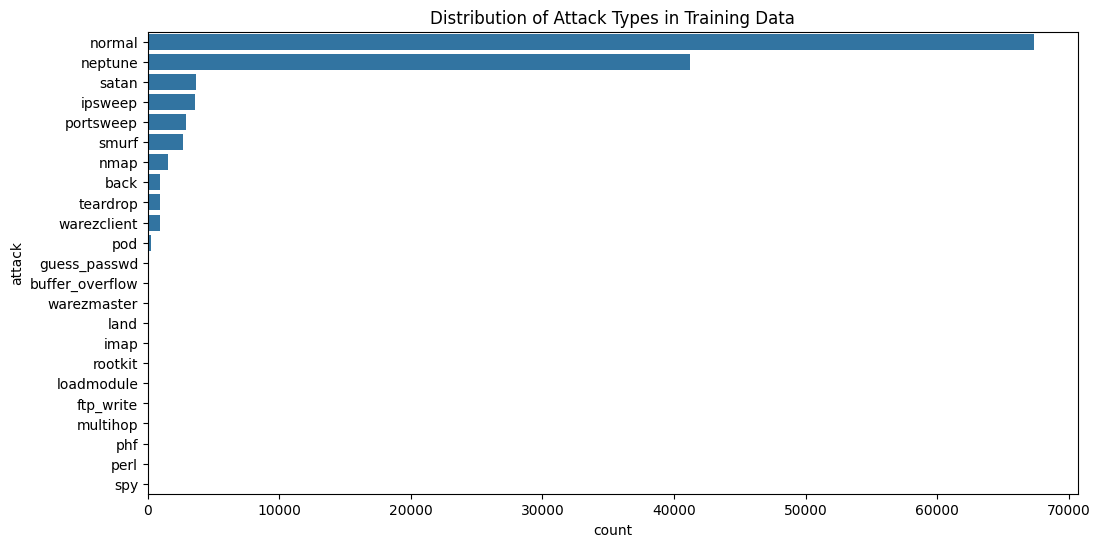

In [728]:
# Check the distribution of the 'attack' column
print("Training data attack distribution:")
print(df_train["attack"].value_counts())

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(y="attack", data=df_train, order=df_train["attack"].value_counts().index)
plt.title("Distribution of Attack Types in Training Data")
plt.show()

In [729]:
# Examine unique values in the 'attack' column
print("Unique values in the 'attack' column:")
print(df_train["attack"].unique())
print(f"\nNumber of unique attacks: {df_train['attack'].nunique()}")

# Create binary target variable 'is_attack'
# 1 if the is not 'normal', 0 if it is 'normal'
df_train["is_attack"] = df_train["attack"].apply(
    lambda x: 0 if x == "normal" else 1
)

print("\n'is_attack' column created")

# Drop the original multi-class 'class' and 'difficulty' columns
df_train = df_train.drop(columns=['attack', 'level'])

df_train.head()

Unique values in the 'attack' column:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']

Number of unique attacks: 23

'is_attack' column created


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [730]:
# Same for Test
df_test["is_attack"] = df_test["attack"].apply(
    lambda x: 0 if x == "normal" else 1
)

print("\n'is_attack' column created")

# Drop the original multi-class 'class' and 'difficulty' columns
df_test = df_test.drop(columns=['attack', 'level'])
df_test.head()


'is_attack' column created


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


4.4 Class Distributation
 - Goal to visualize the distribution of the new binary target.

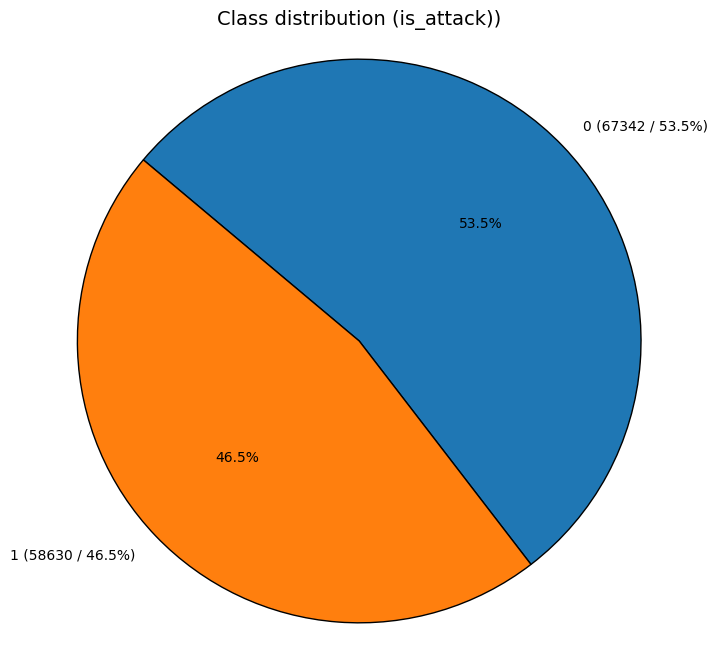

In [731]:
# the 2 most frequent classes in the column ‘is_attack’
top_classes = df_train["is_attack"].value_counts().nlargest(5)

# Labels with count and %
labels = [
    f"{label} ({count} / {count / top_classes.sum():.1%})"
    for label, count in top_classes.items()
]

# circle digramm
plt.figure(figsize=(8, 8))
plt.pie(
    top_classes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    counterclock=False,
    wedgeprops={"edgecolor": "k"}
)
plt.title("Class distribution (is_attack))", fontsize=14)
plt.axis("equal")  # circle
plt.show()

 - The dataset contains 67342 normal connections and 58630 attack connections. 
 - There is a small imbalance (approx. 53% Normal vs. 47% Attack),which is okay. 
  

4.5 Numercial Feature Analysis
 - analyze the the numerical features to understand their scale, central tendency, and spread.

In [732]:
# Get summary statistics for all numerical columns
print("Summary statistics for numerical features:")
df_train.describe()

Summary statistics for numerical features:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,0.465421
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,0.498805
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - **Interpretation**
   - **Scale**: What we can observe is, that some features for example **src_bytes** and **dst_bytes** can go into the millions, while in the other hand features like **dst_host_serror_rat** are between 0 and 1. This recognition makes technices like **feature scaling** (StandardScaler) a mandatory step.
   - **Zero Variance**: The feature **num_outbound_cmds** has a std of 0, meaning it it has the same value for all records. This feature is useless for prediction and should be removed from the dataset.
   - **Skewness**: A few features like **src_bytes** have a mean that is much larger than the median (50% percentile), and a max value that is extremely far from the 75th percentile. This indicates strong right-skewness and maybe presence of outliers. I will check this later.

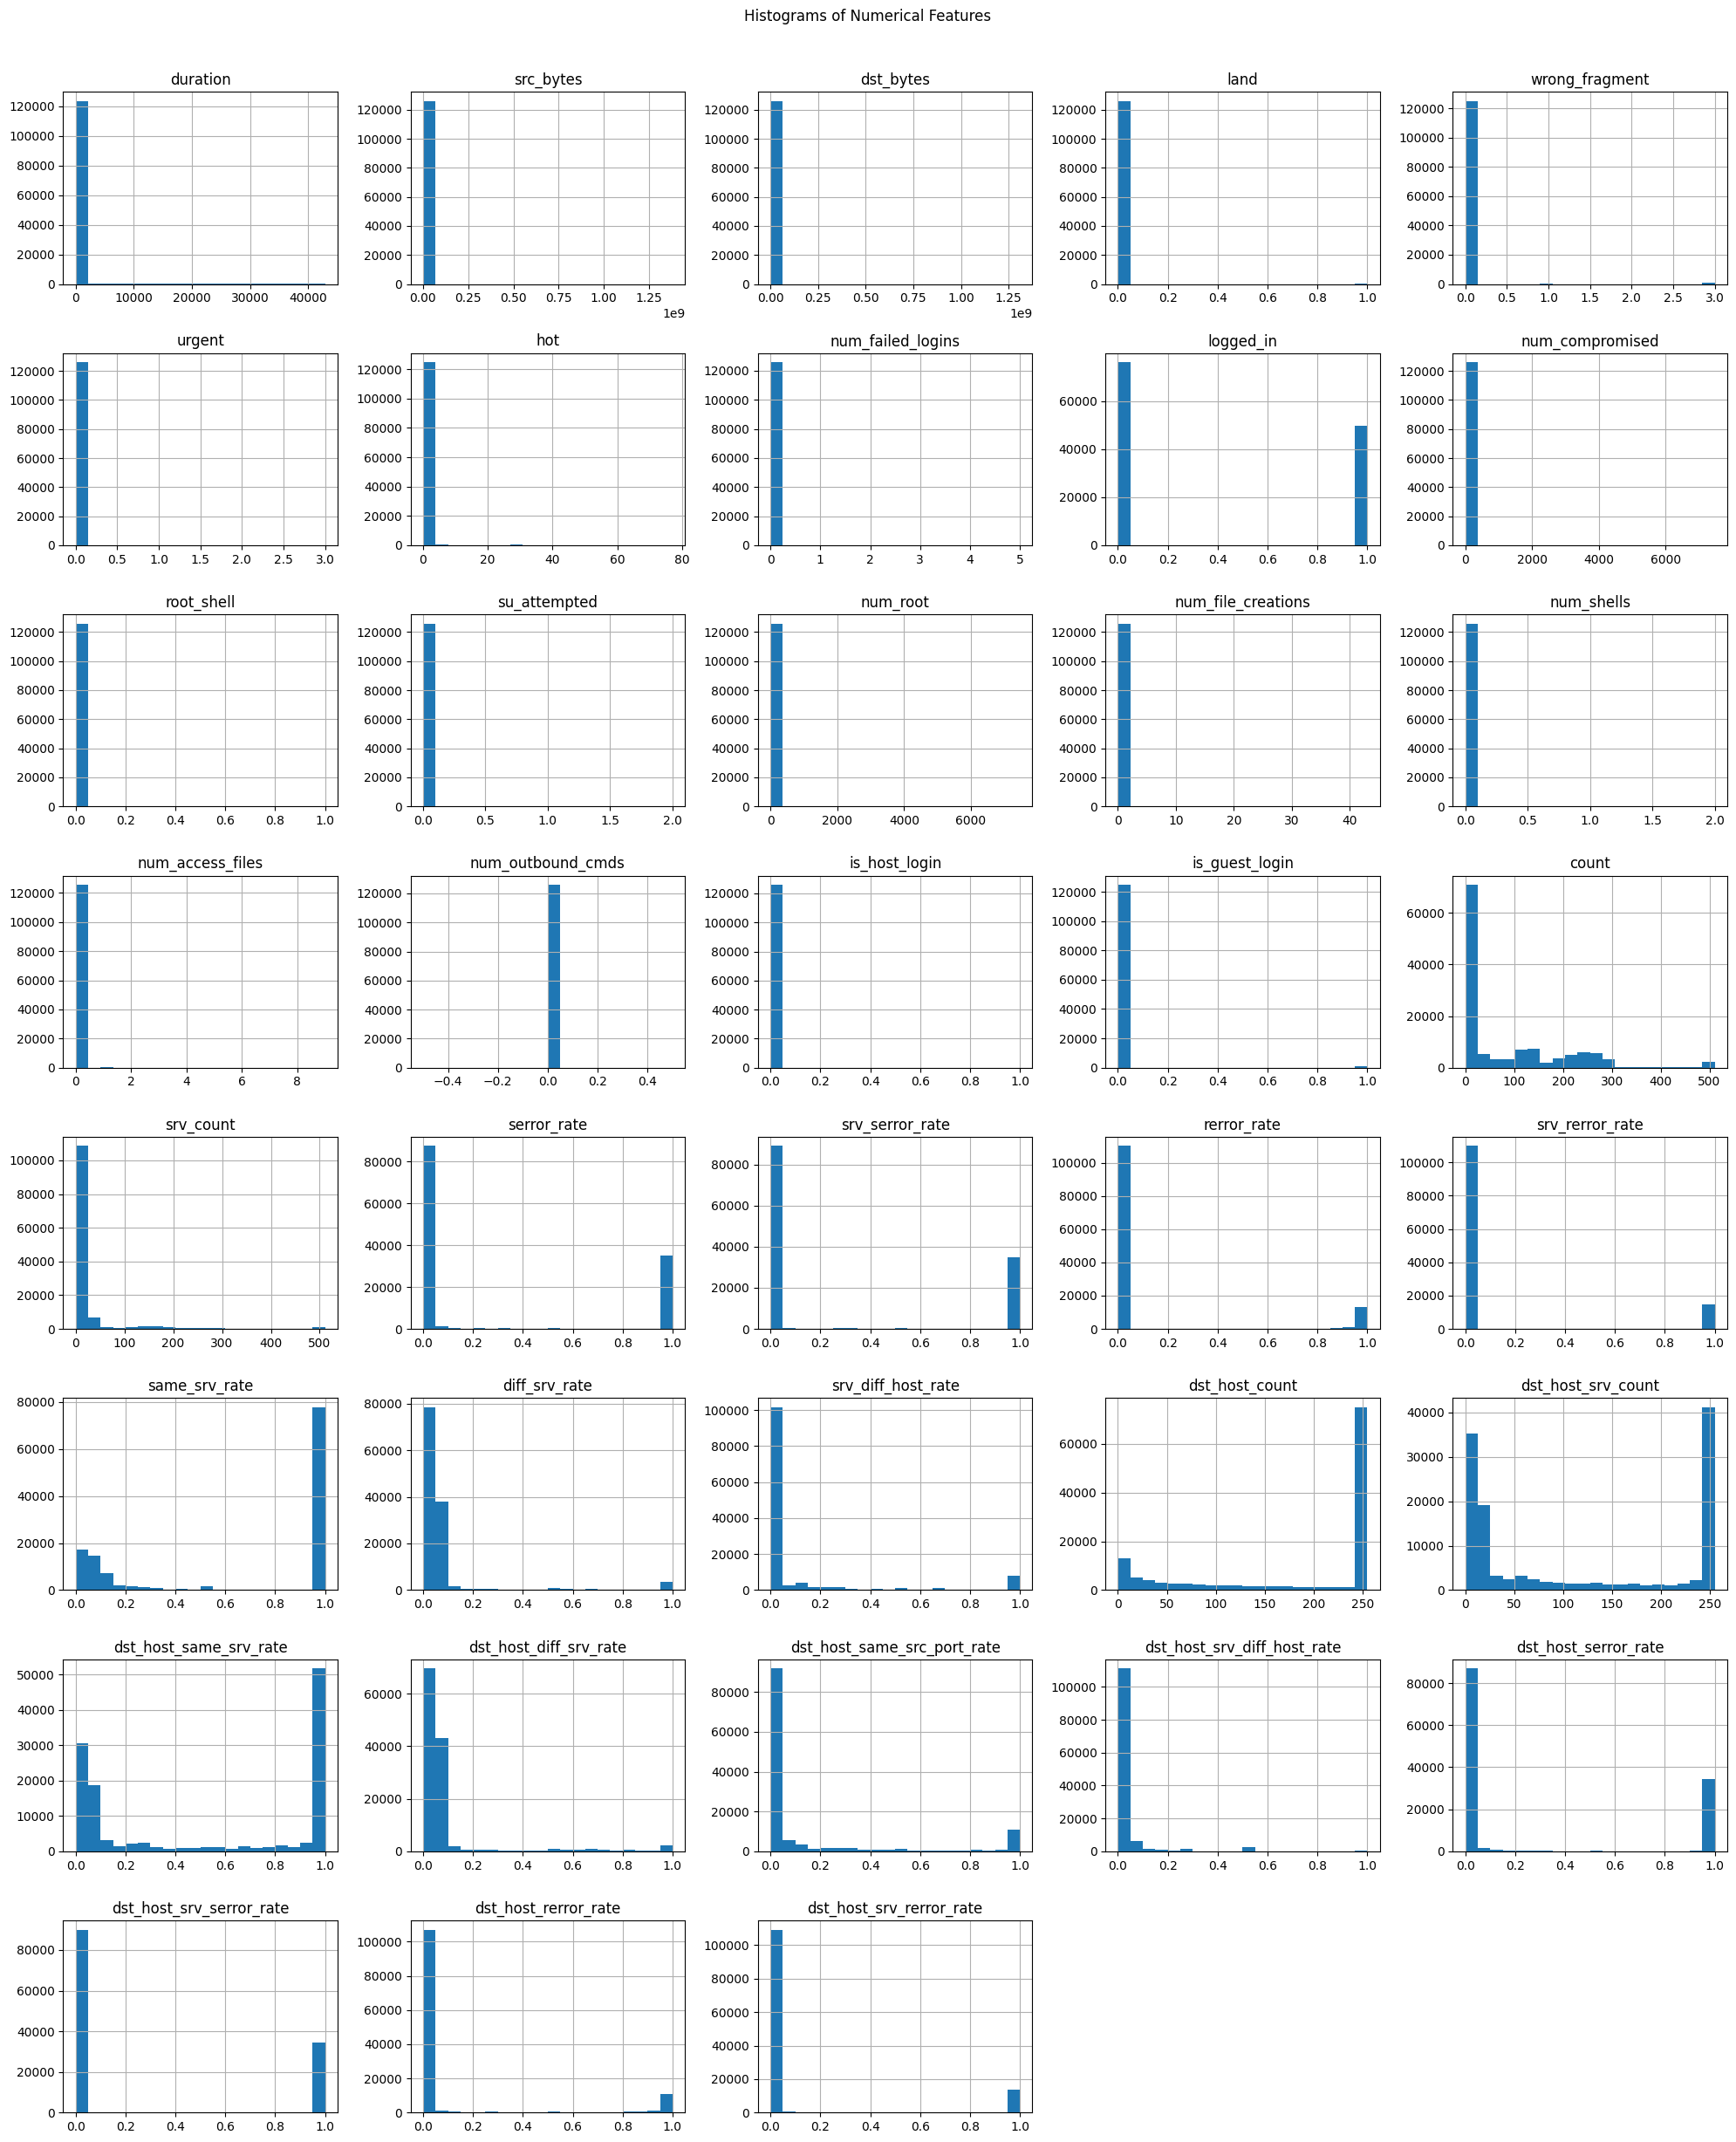

In [733]:
# Select only numerical columns for plotting
numerical_features = df_train.select_dtypes(
    include=np.number
).columns.tolist()
numerical_features.remove("is_attack") # Exclude the target variable

# Plot histograms for numerical features
df_train[numerical_features].hist(
    bins=20, figsize=(20, 25), layout=(8, 5)
)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

 - The histograms of the various features reveal that most of them are highly skewed, with the majority of values concentrated near zero. Based on my understanding, this behavior is not uncommon in network domain data, as most connections tend to be short and transmit only a small number of bytes.

4.5.1 Outliers Analysis
 - as i mentioed before there are some indicators that outliers are present

<Figure size 2000x4000 with 0 Axes>

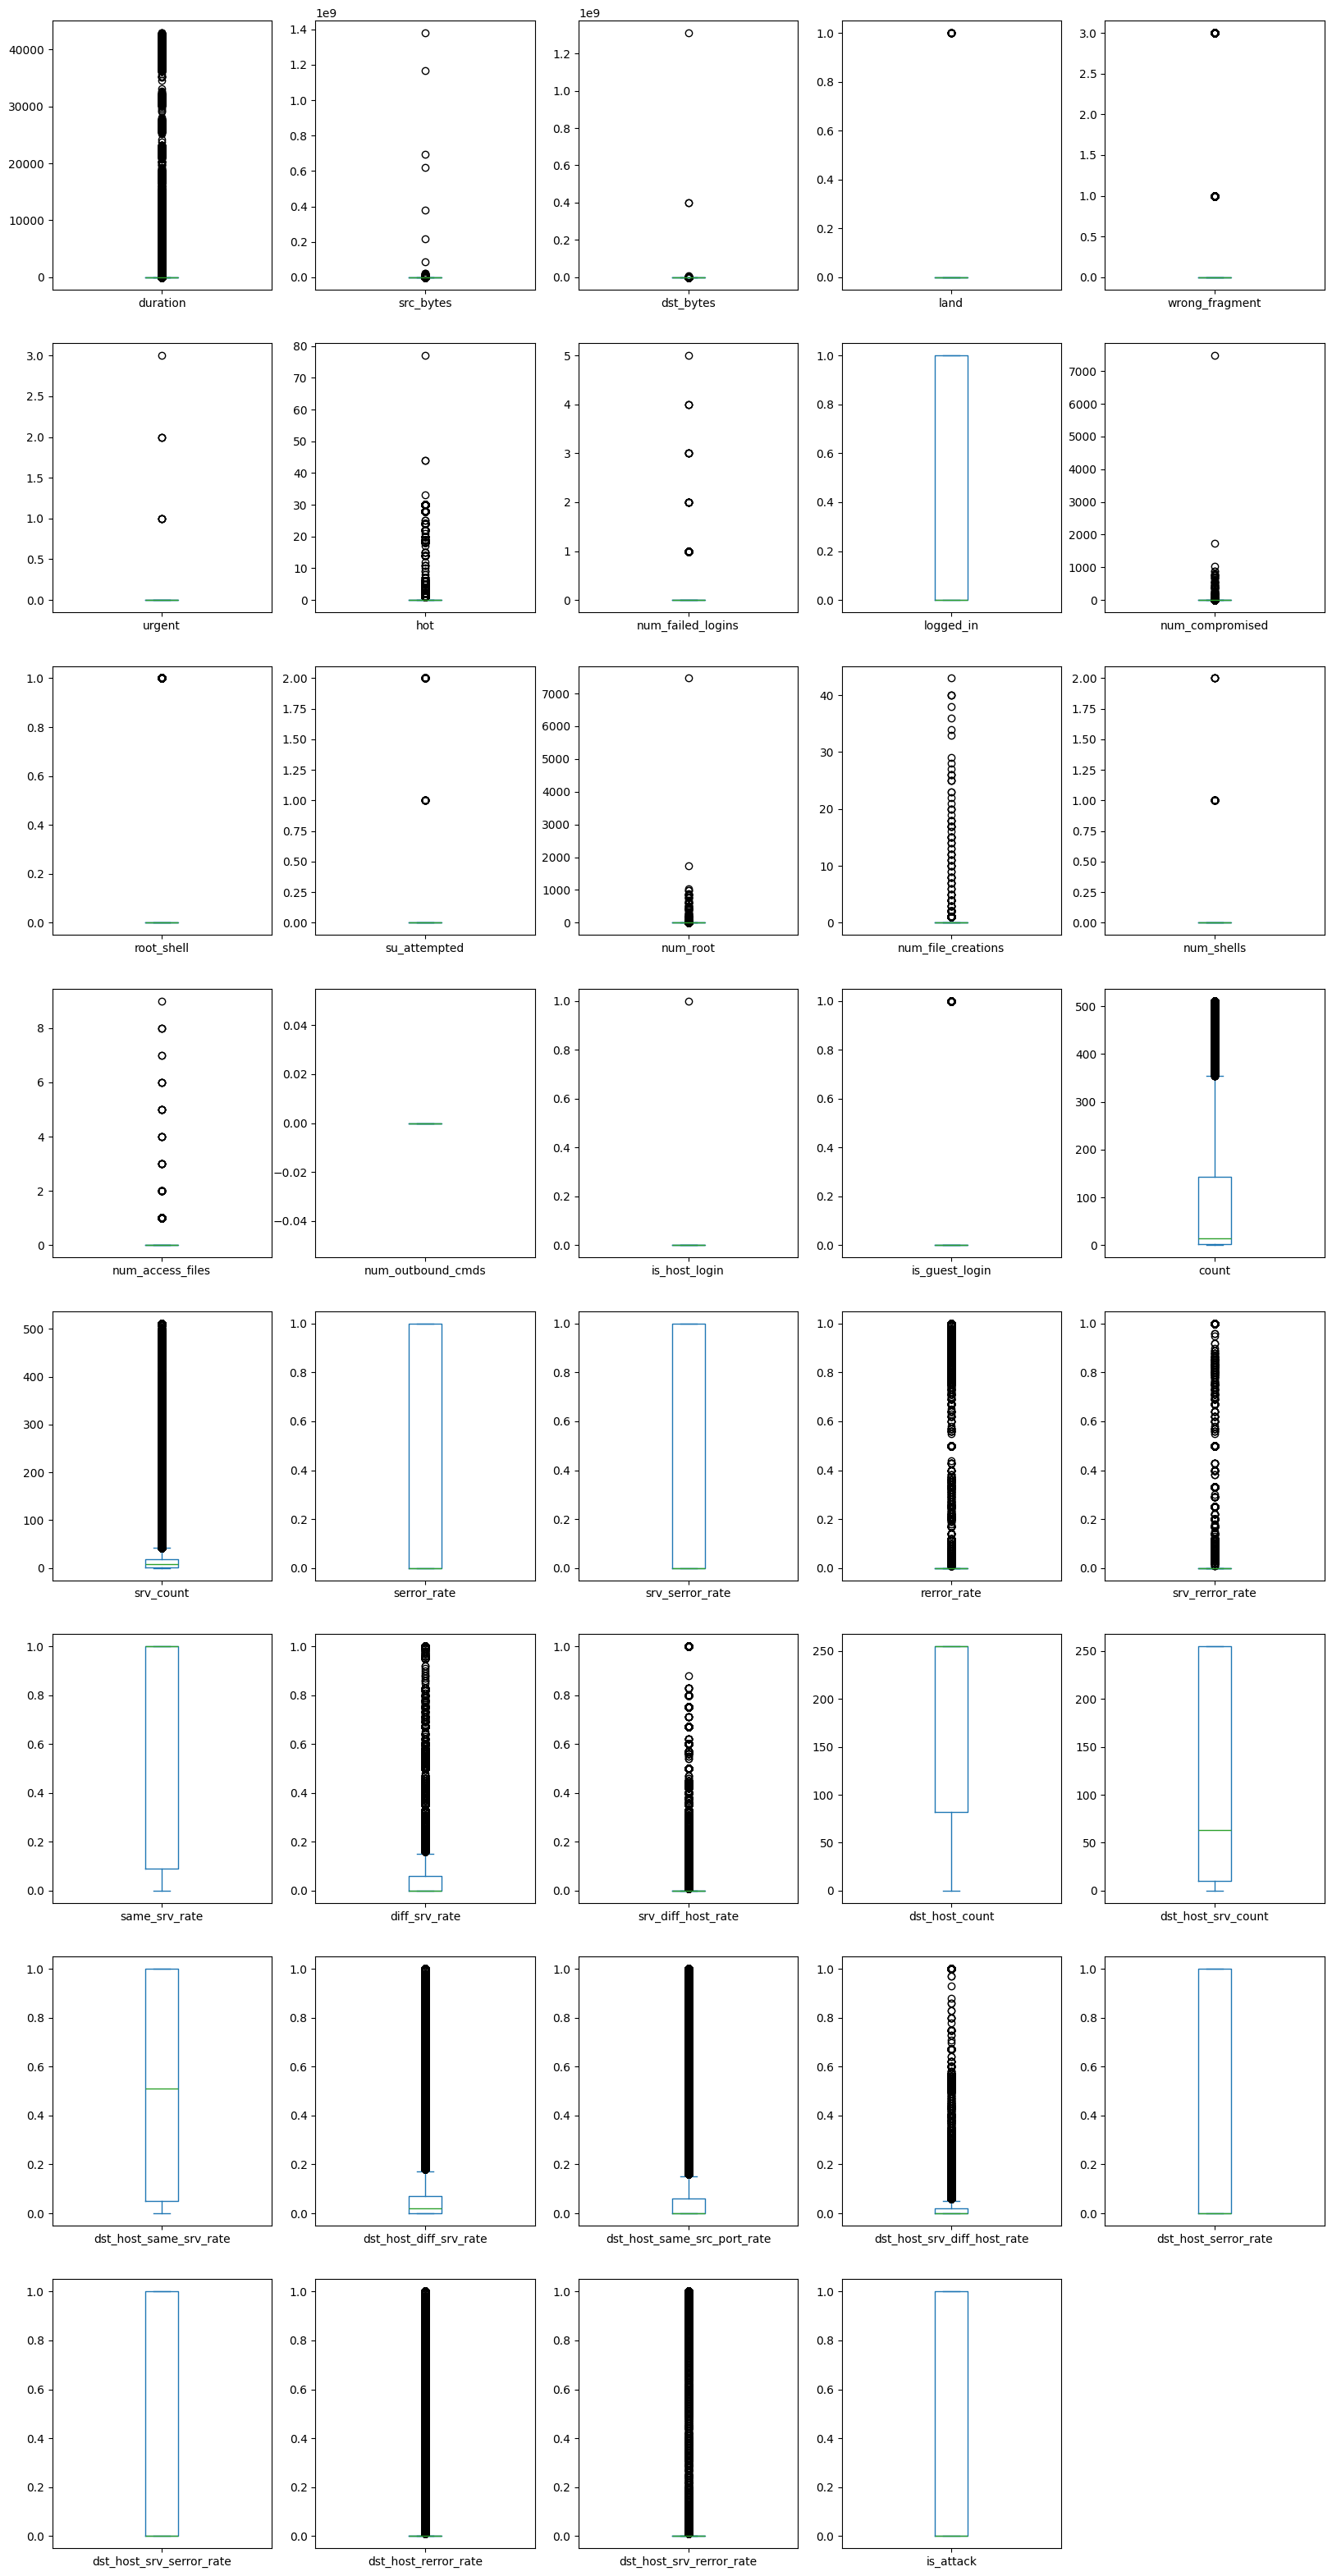

In [734]:
plt.figure(figsize=(20, 40))
df_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

- **Interpretation**
    -  significant number of **outliers** are observed across many features (like **duration**, **src_bytes**, **dst_bytes**, **count**, **srv_count**). This is typical for network security datasets, as anomalies or attacks often manifest as extreme values.

4.6. Categorial Features Analysis

C:\Users\marce\AppData\Local\Temp\ipykernel_12356\888854842.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


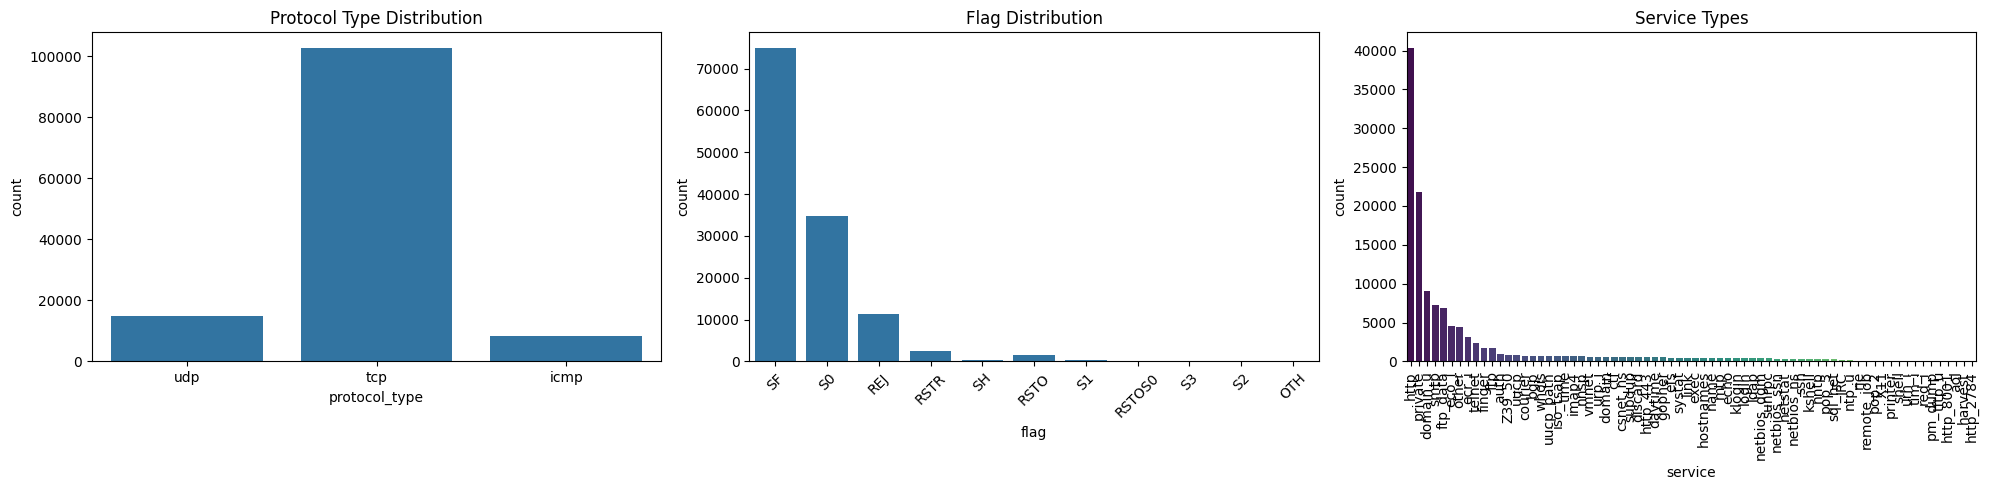

Number of unique service types: 70


In [735]:
# Identify categorical features
categorical_features = df_train.select_dtypes(
    include="object"
).columns

plt.figure(figsize=(20, 5))

# Plot for 'protocol_type'
plt.subplot(1, 3, 1)
sns.countplot(x="protocol_type", data=df_train)
plt.title("Protocol Type Distribution")

# Plot for 'flag'
plt.subplot(1, 3, 2)
sns.countplot(x="flag", data=df_train)
plt.title("Flag Distribution")
plt.xticks(rotation=45)

# Plot for 'service' (top 20)
plt.subplot(1, 3, 3)
top_services = df_train["service"].value_counts().index
sns.countplot(
    x="service",
    data=df_train,
    order=top_services,
    palette="viridis",
)
plt.title("Service Types")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

print(
    f"Number of unique service types: {df_train['service'].nunique()}"
)

- **Interpretation**
   - In the first diagramm **protocol_type** you can see, that **TCP** is the most used protocol, followed by **UDP** and **ICMP**
   - In the **Flag Distributation** Plot you can see the distributation of the status of the connection. 
  
        | Flag Code | Meaning                                               |
        |-----------|-------------------------------------------------------|
        | SF        | Successful connection                                 |
        | S0        | Connection attempt seen, no reply                     |
        | REJ       | Connection rejected                                   |
        | RSTR      | Connection reset                                      |
        | SH        | Connection established, then half-closed              |
        | RSTO      | Connection reset by receiver                          |
        | RSTOS0    | Connection reset without response                     |
        | S1        | Connection attempt, 1 packet received                 |
        | S2        | Connection attempt, 2 packets received                |
        | S3        | Connection attempt, 3 packets received                |
        | OTH       | Other TCP connection statuses                         |

  - In the **Service Types** Diagramm you can see all different services. There are 70 unique service types. **http** is the most common, followed by **private** and **domain_u**. The high cardinality of this feature means that One-Hot Encoding will create many new columns.


4.7. Numerical Feature Correlation
 - I want so see if how the numerical features relate to each other. Idea: if features are highly correalted, maybe we can reduce the number of features to reduce edundancy in the model.

In [736]:
#correlation matrix for numerical features
correlation_matrix = df_train[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

KeyboardInterrupt: 

- **Conclusion**
   - **serror_rate** and **srv_serror_rate** are highly correlated.
   - **rerror_rate** and **srv_rerror_rate** are highly correlated.
   - **dst_host_srv_count** and **dst_host_same_srv_rate** are highly correlated.
   - **num_compromised** and **num_root** are highly correlated.

- **Summary Data Exploratory and Analysis**
    - The Dataset has no missing values
    - The Dataset has no null values
    - The Dataset has no duplicates in the Data
    - There is a small imbalance in the classes (attack vs. normal)
    - There are three columns with object datatypes (protocol_type, service and flag) 
    - Next Steps:  
        - Apply **One-Hot Endocing** for the categorical columns
        - Implementation of **StandardScaler** to reduce the scale
        - Remove the column **num_outbound_cmds** from the dataset (zero variance)
        - Further deep dive into high correlated columns


5. Data Preprocessing

5.1 Remove columns with zero Variance
 - as i mentined before, there is a column (num_outbound_cmds) whith zero variance 
 - i will do a small analysis to be sure, that the removal is eligible

In [ ]:
print(f"--- Unique values in '{'num_outbound_cmds'}' ---")
print(df_train['num_outbound_cmds'].unique())

print(f"\n--- Value Counts for '{'num_outbound_cmds'}' ---")
print(df_train['num_outbound_cmds'].value_counts())

print(f"--- Variance of '{'num_outbound_cmds'}' ---")
print(f"Variance: {df_train['num_outbound_cmds'].var()}")

variances = df_train[numerical_features].var()


print("--- Features with Zero Variance ---")
zero_variance_features = variances[variances == 0].index.tolist()

if zero_variance_features:
    print(f"The following numerical features have zero variance: {zero_variance_features}")

else:
    print("No numerical features found with zero variance.")

--- Unique values in 'num_outbound_cmds' ---
[0]

--- Value Counts for 'num_outbound_cmds' ---
num_outbound_cmds
0    125972
Name: count, dtype: int64
--- Variance of 'num_outbound_cmds' ---
Variance: 0.0
--- Features with Zero Variance ---
The following numerical features have zero variance: ['num_outbound_cmds']
These features do not contribute to distinguishing between data points and can often be removed.


In [ ]:
#drop zero variance features
df_train.drop("num_outbound_cmds", axis=1, inplace=True)
print("Dropped 'num_outbound_cmds' column.")
df_train.head() 

df_test.drop("num_outbound_cmds", axis=1, inplace=True)
print("Dropped 'num_outbound_cmds' column.")
df_test.head()

Dropped 'num_outbound_cmds' column.
Dropped 'num_outbound_cmds' column.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


- **Conclusion**: The column has zero Variance so i will remove it. Furthermore there are no other column with zero variance. The number of columns before 44 now 43.

5.2 Seperate Features and Target


In [ ]:
# Seperate Features and Target
X_train_raw = df_train.drop('is_attack', axis=1)
y_train = df_train['is_attack']

X_test_raw = df_test.drop('is_attack', axis=1)  
y_test = df_test['is_attack']   

5.2 Apply One-Hot Encoding for Categorical Features
 -  Why? Features like **protocol_type**, **service**, and **flag** are text-based. ML algorithms require numerical input. 

In [ ]:
# Identify categorical and numerical features
# Based on common NSL-KDD column types
categorical_features = ['protocol_type', 'service', 'flag']

# All other features that are not categorical and not the target
numerical_features = [
    col
    for col in X_train_raw.columns
    if col not in categorical_features and col != 'is_attack'
]

print("\nCategorical features identified:", categorical_features)
print("Numerical features identified:", numerical_features)


Categorical features identified: ['protocol_type', 'service', 'flag']
Numerical features identified: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a preprocessor using ColumnTransformer
# It applies OneHotEncoder to categorical features and StandardScaler to numerical features.
# 'remainder='passthrough' ensures that any columns not specified are kept in the output.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features),
    ],
    remainder='passthrough',  # Keep other columns if any, though none expected here
)

# Fit the preprocessor on the training data and transform both training and testing data
# It's crucial to fit on training data ONLY to prevent data leakage.
# Then, transform both training and testing data using the fitted preprocessor.
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

# The output of ColumnTransformer is a NumPy array.
# If you want to convert it back to a DataFrame with column names, it's more involved
# due to the dynamic nature of OneHotEncoder creating new columns.
# For machine learning models, a NumPy array is perfectly fine.

print("\nShape of processed training data (X_train_processed):", X_train_processed.shape)
print("Shape of processed testing data (X_test_processed):", X_test_processed.shape)

print("\nExample of processed data (first 5 rows of X_train_processed):")
# Due to one-hot encoding, the number of columns will increase significantly.
# Printing raw numpy array for demonstration.
print(X_train_processed[:5])

6. Model Training (Traditional ML Models)
 - Models:
   - Logistic Regression
   - SVM
   - Random Forest
   - Decision Tree
   - KNN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models. Use class_weight='balanced' where available.
# This tells the model to penalize mistakes on the minority class more heavily.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(), # KNN does not support class_weight
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced')
}

# Train each model on the original (but scaled) training data
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_processed, y_train)
    print(f"{name} trained.")

Training Logistic Regression...
Logistic Regression trained.
Training KNN...
KNN trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training SVM...
SVM trained.


7. Model Training ANN


8. Model Evaluation & Comparison

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

def evaluate_model(name, model, X_test, y_test):
    if name == "ANN":
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"--- {name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * (len(name) + 22))

--- Logistic Regression Evaluation ---
Accuracy: 0.7542
Precision: 0.9169
Recall: 0.6249
F1-Score: 0.7433
ROC AUC: 0.7937


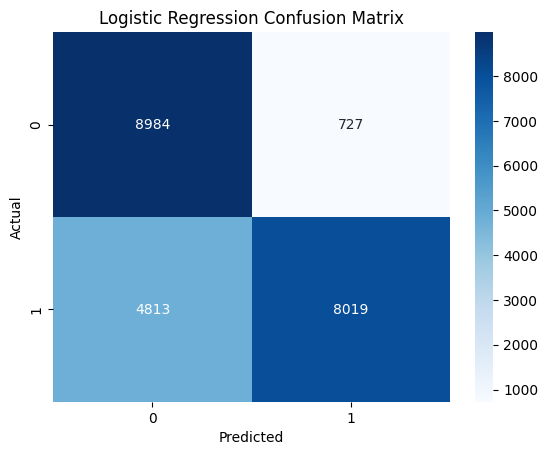

-----------------------------------------
--- KNN Evaluation ---
Accuracy: 0.7802
Precision: 0.9679
Recall: 0.6350
F1-Score: 0.7669
ROC AUC: 0.8274


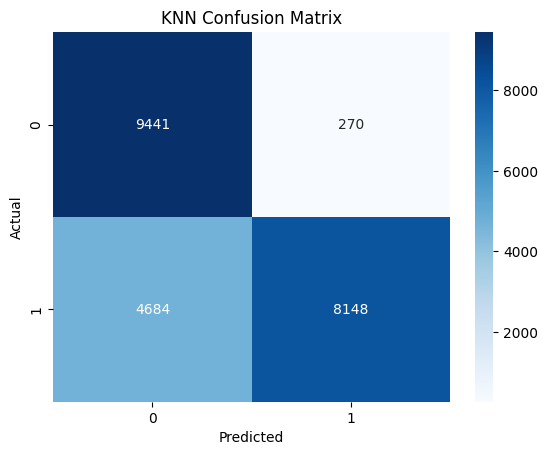

-------------------------
--- Decision Tree Evaluation ---
Accuracy: 0.7935
Precision: 0.9574
Recall: 0.6669
F1-Score: 0.7862
ROC AUC: 0.8138


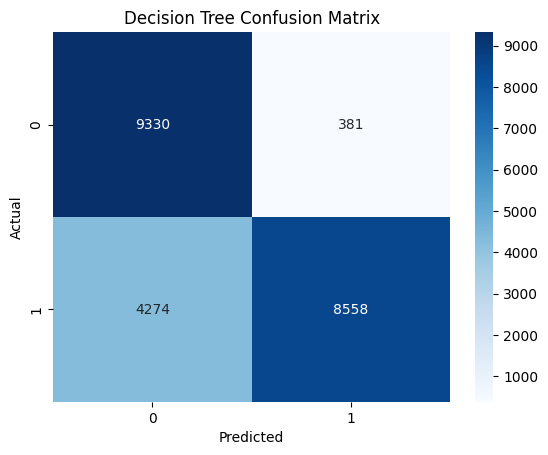

-----------------------------------
--- Random Forest Evaluation ---
Accuracy: 0.7679
Precision: 0.9683
Recall: 0.6123
F1-Score: 0.7502
ROC AUC: 0.9611


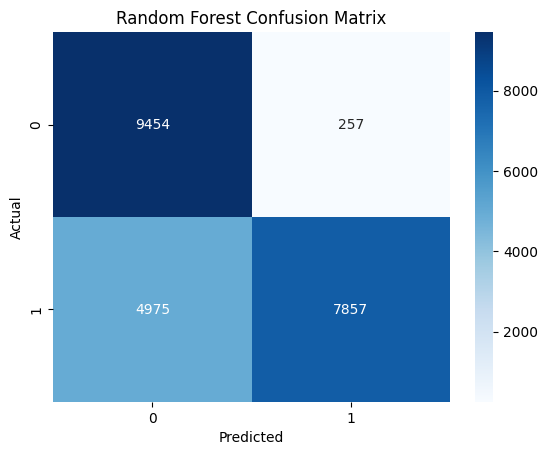

-----------------------------------
--- SVM Evaluation ---
Accuracy: 0.7787
Precision: 0.9615
Recall: 0.6368
F1-Score: 0.7662
ROC AUC: 0.8889


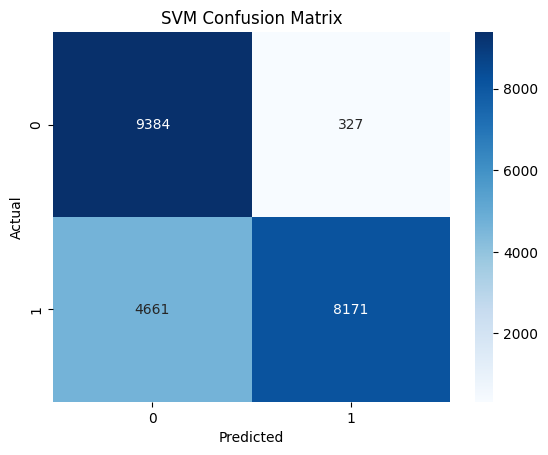

-------------------------


In [ ]:
# Evaluate all models on the scaled, unseen test data
for name, model in models.items():
    evaluate_model(name, model, X_test_processed, y_test)

#evaluate_model("ANN", ann_model, X_test_scaled, y_test)